In [1]:
import os
os.chdir(r'C:\Users\Navid\Documents\keyword_extraction_food_delivery')

In [80]:
#!conda install seaborn
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
import re

In [81]:
df = pd.read_csv('ubereat')

In [82]:
df.head()

,Unnamed: 0,feedback,rating
0,0,The app keeps crashing. It closes suddenly. I ...,Rated 1 stars out of five stars
1,1,I pay for the monthly pass... And I am pissed ...,Rated 1 stars out of five stars
2,2,"After half a year, the app didn't improve. App...",Rated 1 stars out of five stars
3,3,Worst app. Doesn't even run properly. App trie...,Rated 1 stars out of five stars
4,4,I can't get the app to open when on wifi. I ha...,Rated 1 stars out of five stars


In [83]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [84]:
df.dropna(inplace=True)

In [85]:
df.shape

(6000, 2)

In [86]:
# Lets extract digits from rating column and use them as rating + Convert them to int32
df['rating'] = df['rating'].str.extract('(\d)').astype('int32')

In [87]:
df.head()

,feedback,rating
0,The app keeps crashing. It closes suddenly. I ...,1
1,I pay for the monthly pass... And I am pissed ...,1
2,"After half a year, the app didn't improve. App...",1
3,Worst app. Doesn't even run properly. App trie...,1
4,I can't get the app to open when on wifi. I ha...,1


In [88]:
# Lets take out those reviews with the rating of 3 as they are netural. 
df = df[df.rating != 3]
df.rating.value_counts()

1    2581
5     983
2     951
4     814
Name: rating, dtype: int64

In [89]:
# Now we create a new column that groups together reviews with rating of 4 and 5 as positve and those with rating of 1 and 2 as negative
df['positively_rated'] = df['rating'].apply(lambda x: 1 if x == 4 or x == 5 else 0)

In [91]:
df.positively_rated.value_counts()

0    3532
1    1797
Name: positively_rated, dtype: int64

In [92]:
stop_words = stopwords.words('english') 

In [93]:
# Lets take out negative words as they might be important in the sentiment analysis
string = ' '.join(stop_words)
negative_words = re.findall('\w*n\'', string)


In [94]:
for w in list(stop_words): 
    if w in negative_words:
        stop_words.remove(w)

In [95]:
lemma = WordNetLemmatizer()
def prepare_review(review):
    tokens = word_tokenize(review)
    tokens_sw_removed = [w for w in tokens if w.lower() not in stop_words and w.isalpha()]
    lemmatized_tokens = [lemma.lemmatize(w.lower()) for w in tokens_sw_removed]
    return ' '.join(lemmatized_tokens)
df['review'] = df['feedback'].apply(prepare_review)
    

In [96]:
df.loc[0,'review']

'app keep crashing close suddenly thought buggy old phone using another phone model work well app keep closing asked friend told also occurs ca even order plus attendance worse lost one account lost old phone number gone well could recover asked help support never came ifood never'

In [97]:
# X = df['feedback']
X = df['review']
y = df['positively_rated']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 1)

In [98]:
vect = TfidfVectorizer(min_df = 5, ngram_range = (1,3)).fit(X_train)
X_train_transformed = vect.transform(X_train)
X_test_transformed = vect.transform(X_test)

In [99]:
len(vect.get_feature_names())

11074

In [100]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier

In [101]:
model = LogisticRegression(C = 1)
model.fit(X_train_transformed, y_train)



LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [23]:
# model = RandomForestClassifier()
# model.fit(X_train_transformed, y_train)


In [24]:
roc_auc_score(y_test, model.predict(X_test_transformed))

1.0

In [25]:
feature_names = np.array(vect.get_feature_names())

# Sort the coefficients from the model
sorted_coef_index = model.coef_[0].argsort()
print('Smallest Coefs:\n{}\n'.format(feature_names[sorted_coef_index[:40]]))
print('Largest Coefs: \n{}'.format(feature_names[sorted_coef_index[:-91:-1]]))

Smallest Coefs:
['easy' 'like' 'great' 'good' 'easy use' 'driver' 'helpful' 'love'
 'especially' 'really' 'far' 'bit' 'thing' 'price' 'lot' 'drink' 'feature'
 'complaint' 'issue' 'convenient' 'better' 'place' 'since'
 'delivery person' 'food' 'use' 'amazing' 'item' 'many' 'often'
 'great app' 'well' 'good app' 'sometimes' 'reliable' 'like app' 'decide'
 'dont' 'translation' 'careful']

Largest Coefs: 
['even' 'error' 'tried' 'phone' 'phone number' 'help' 'number' 'got'
 'screen' 'keep' 'nothing' 'message' 'email' 'using' 'account' 'wo' 'rate'
 'horrible' 'pick' 'new' 'minute' 'ca' 'ca even' 'hour' 'never' 'worst'
 'work' 'able' 'open' 'finally' 'get food' 'load' 'info' 'server'
 'received' 'told' 'interface' 'uninstalled' 'get' 'either' 'page' 'card'
 'asking' 'year' 'see' 'problem' 'app sometimes' 'way' 'reinstalled'
 'dish' 'already' 'almost' 'impossible' 'single' 'terrible' 'arrived'
 'support' 'paid' 'reported' 'ok' 'email address' 'display' 'user'
 'transaction' 'taken' 'bank' 'ap

In [103]:
df_negative = df[df.positively_rated==0]
X_negative = df_negative['review']
df_positive=df[df.positively_rated==1]
X_positive = df_positive['review']
# vect2 = CountVectorizer(ngram_range = (1,2)).fit([' '.join(X_negative)])
# X_negative_transformed = vect2.transform([' '.join(X_negative)])
# vect3 = CountVectorizer(ngram_range = (1,2)).fit([' '.join(X_positive)])
# X_positive_transformed = vect3.transform([' '.join(X_positive)])

In [146]:
dict_text = {1:[' '.join(X_positive)],0:[' '.join(X_negative)]}
df_pos_rated = pd.DataFrame.from_dict(dict_text).transpose()
df_pos_rated.rename(columns={0:'text'},inplace=True)
vect4 = TfidfVectorizer(ngram_range = (1,3)).fit(df_pos_rated.text)
text_transformed = vect4.transform(df_pos_rated.text)

In [147]:
df_pos_rated_vectorized = pd.DataFrame(text_transformed.toarray(), columns=vect4.get_feature_names())

In [148]:
df_pos_rated_vectorized

,able,able app,able app give,able cancel,able cancel charged,able change,able change seem,able get,able get help,able log,...,yet checked receipt,yet keep,yet keep getting,yet need,yet need work,zero,zero could,zero could based,zero discount,zero discount money
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.037039,0.004358,0.004358,0.004358,0.004358,0.004824,0.004824,0.004513,0.004513,0.004824,...,0.004824,0.004824,0.004824,0.00498,0.00498,0.009026,0.004513,0.004513,0.004513,0.004513


In [149]:
df_final = df_pos_rated_vectorized.transpose()
df_final

,0,1
able,0.0,0.037039
able app,0.0,0.004358
able app give,0.0,0.004358
able cancel,0.0,0.004358
able cancel charged,0.0,0.004358
...,...,...
zero,0.0,0.009026
zero could,0.0,0.004513
zero could based,0.0,0.004513
zero discount,0.0,0.004513


In [150]:
df_final.rename(columns={0:'negative', 1:'positive'},inplace=True)

In [151]:
top_dict = {}
for i in df_final.columns:
    top = df_final[i].sort_values(ascending=False).head(30)
    top_dict[i] = list(zip(top.index, top.values))
top_dict

{'negative': [('app', 0.4446107362844944),
  ('order', 0.2933270444796205),
  ('food', 0.17556644347241754),
  ('time', 0.16310273022712962),
  ('use', 0.1557964155660988),
  ('restaurant', 0.1480603176897132),
  ('delivery', 0.14333270232081088),
  ('like', 0.12721583174500756),
  ('issue', 0.11904995065326722),
  ('good', 0.10508199615423768),
  ('uber', 0.0971310066701747),
  ('great', 0.09627144023946518),
  ('easy', 0.09089915004753074),
  ('service', 0.0885353423630796),
  ('driver', 0.0885353423630796),
  ('get', 0.07736097876385595),
  ('many', 0.06898020606443822),
  ('easy use', 0.06489726551856805),
  ('option', 0.0644674823032133),
  ('could', 0.0644674823032133),
  ('helpful', 0.06372678054593862),
  ('need', 0.05952497532663361),
  ('item', 0.05845051728824672),
  ('also', 0.05845051728824672),
  ('sometimes', 0.05823562568056934),
  ('love', 0.05802073407289197),
  ('really', 0.057376059249859834),
  ('far', 0.056946276034505076),
  ('want', 0.05221866066560277),
  ('pla

In [161]:
df_negative = df[df.positively_rated==0]
X_negative = df_negative['review']
df_positive=df[df.positively_rated==1]
X_positive = df_positive['review']
vect2 = CountVectorizer(min_df=8, ngram_range = (2,2)).fit(X_negative)
X_negative_transformed = vect2.transform(X_negative)
vect3 = CountVectorizer(min_df=8, ngram_range = (2,2)).fit(X_positive)
X_positive_transformed = vect3.transform(X_positive)

In [162]:
df_pos_rated_vectorized = pd.DataFrame(X_positive_transformed.toarray(), columns=vect3.get_feature_names()).transpose()

In [163]:
df_pos_rated_vectorized

,0,1,2,3,4,5,6,7,8,9,...,1787,1788,1789,1790,1791,1792,1793,1794,1795,1796
accepting card,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
access account,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
access hopefully,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
accessible food,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
accidentally ordered,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
wrongly first,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
yeah became,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
year cable,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
year despite,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [164]:
df_pos_rated_vectorized['average'] = df_pos_rated_vectorized.mean(axis=1) 

In [166]:
df_pos_rated_vectorized['average'].sort_values(ascending=False).head(40)

easy use              0.168058
use app               0.101280
uber eats             0.099610
great app             0.082916
delivery person       0.067891
good app              0.067891
like app              0.065665
app easy              0.051753
feel like             0.050640
love app              0.050640
app work              0.049527
much better           0.048971
please fix            0.048971
work well             0.048971
customer service      0.048971
make change           0.035615
pretty good           0.035615
app issue             0.035615
issue getting         0.035615
order food            0.035058
could go              0.035058
order correctly       0.035058
good service          0.034502
never issue           0.034502
issue app             0.034502
super convenient      0.034502
app helpful           0.034502
door dash             0.034502
order restaurant      0.034502
restaurant part       0.033945
also app              0.033945
contact restaurant    0.033945
use uber

In [167]:
df_neg_rated_vectorized = pd.DataFrame(X_negative_transformed.toarray(), columns=vect2.get_feature_names()).transpose()

In [169]:
df_neg_rated_vectorized['average'] = df_neg_rated_vectorized.mean(axis=1) 

In [170]:
df_neg_rated_vectorized['average'].sort_values(ascending=False).head(40)

phone number               0.138165
use app                    0.077576
ca even                    0.066535
uber eats                  0.065119
customer service           0.061438
app keep                   0.051529
get food                   0.050396
payment method             0.043601
customer support           0.043601
app sometimes              0.043035
order app                  0.042186
email address              0.041903
app tell                   0.041336
delivery fee               0.034541
first time                 0.034541
credit card                0.034541
server error               0.034258
app work                   0.034258
wo let                     0.034258
using app                  0.033975
several time               0.033692
time order                 0.033692
uninstalled reinstalled    0.033409
half year                  0.027180
year ago                   0.026614
pretty much                0.026614
app wo                     0.026614
help support               0

In [188]:
df_neg = df_neg_rated_vectorized.sort_values('average', ascending=False).head(80)

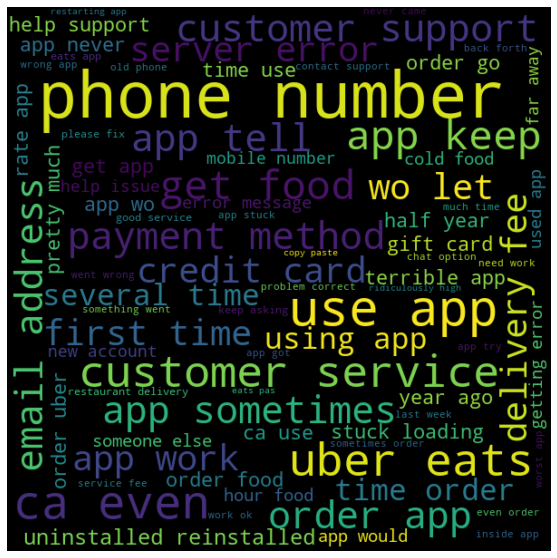

In [190]:
from wordcloud import WordCloud , STOPWORDS
wc = WordCloud(width = 600 , height = 600 , background_color = 'black' , stopwords = STOPWORDS)
wc.generate_from_frequencies(df_neg['average'].to_dict())
plt.figure(figsize  = (10,10))
plt.imshow(wc , interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [194]:
df_pos = df_pos_rated_vectorized.sort_values('average', ascending=False).head(50)

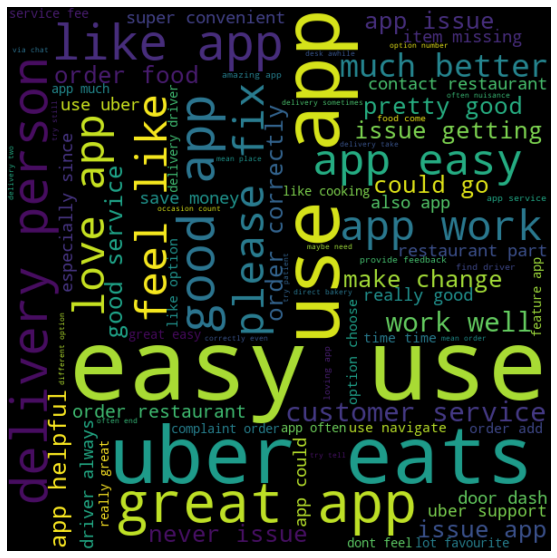

In [193]:
wc = WordCloud(width = 600 , height = 600 , background_color = 'black' , stopwords = STOPWORDS)
wc.generate_from_frequencies(df_pos['average'].to_dict())
plt.figure(figsize  = (10,10))
plt.imshow(wc , interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [176]:
synonyms = []
antonyms = []

for syn in wordnet.synsets("good"):
    for l in syn.lemmas():
        synonyms.append(l.name())
        if l.antonyms():
                 antonyms.append(l.antonyms()[0].name())

print(set(synonyms))
print(set(antonyms))

{'practiced', 'honorable', 'commodity', 'in_effect', 'in_force', 'goodness', 'thoroughly', 'secure', 'skillful', 'near', 'skilful', 'safe', 'good', 'undecomposed', 'well', 'dependable', 'trade_good', 'proficient', 'right', 'respectable', 'unspoiled', 'adept', 'sound', 'ripe', 'salutary', 'beneficial', 'upright', 'honest', 'just', 'expert', 'effective', 'unspoilt', 'serious', 'dear', 'soundly', 'full', 'estimable'}
{'bad', 'evil', 'badness', 'ill', 'evilness'}


In [ ]:
wc = WordCloud(width = 600 , height = 600 , background_color = 'black' , stopwords = STOPWORDS)
wc.generate_from_frequencies(df_neg['average'].to_dict())
plt.figure(figsize  = (10,10))
plt.imshow(wc , interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [182]:
df_neg_rated_vectorized['average'].to_dict()

{'able app': 0.007927519818799546,
 'able cancel': 0.007927519818799546,
 'able change': 0.008776896942242356,
 'able get': 0.008210645526613816,
 'able log': 0.008776896942242356,
 'able order': 0.008776896942242356,
 'able removing': 0.008776896942242356,
 'able talk': 0.008210645526613816,
 'absolute as': 0.007927519818799546,
 'absolutely shameless': 0.007927519818799546,
 'accept card': 0.008776896942242356,
 'accept email': 0.009060022650056626,
 'accept payment': 0.007927519818799546,
 'access app': 0.009060022650056626,
 'accessing basket': 0.008493771234428085,
 'accidentally put': 0.008776896942242356,
 'account already': 0.008210645526613816,
 'account app': 0.008210645526613816,
 'account cause': 0.008776896942242356,
 'account computer': 0.008776896942242356,
 'account could': 0.008210645526613816,
 'account deleted': 0.008493771234428085,
 'account dl': 0.008493771234428085,
 'account enter': 0.008210645526613816,
 'account help': 0.008210645526613816,
 'account inconveni